In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

## Generate the Dataset

In [32]:
from numpy.random import RandomState


x,y = make_classification(n_samples=1000,n_features=5,n_classes=2,random_state=1)

In [33]:
x

array([[-1.39087601,  0.62478042,  3.4809096 ,  2.3823372 ,  0.38622388],
       [-0.48529475,  0.30051483,  1.33915253,  0.84620081,  1.17745439],
       [-0.73504687,  0.13412273,  1.54350554,  1.22343943, -0.62879943],
       ...,
       [-0.82358043, -1.67277753, -1.02365026,  1.04002816, -0.11854175],
       [ 0.98789408,  2.10104553,  1.37063331, -1.23037436, -0.56362206],
       [ 0.63522093,  1.25870523,  0.74197203, -0.8078796 , -0.9128101 ]])

## Split the dataset into training and testing sets

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

## Initialize and train the decision tree classifier

In [35]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Make predictions on the test set

In [36]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

## Calculate the Confusion Matrix:

In [37]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[133,  26],
       [ 30, 111]], dtype=int64)

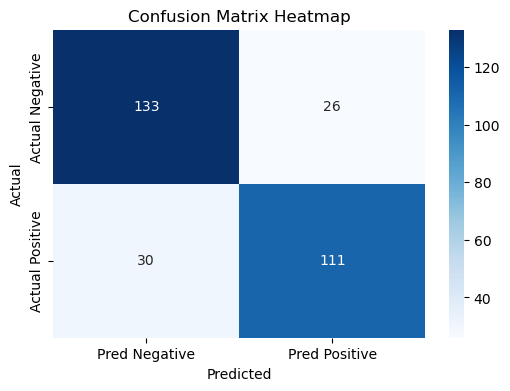

In [38]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Negative', 'Pred Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


## Split the confusion matrix into TP, FP, FN, TN
The ravel() method is used to flatten the confusion matrix into a 1D array

In [39]:
tn, fp, fn, tp = cm.ravel()
print("True Positives (TP):", tp)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Negatives (TN):", tn)


True Positives (TP): 111
False Positives (FP): 26
False Negatives (FN): 30
True Negatives (TN): 133


## Calculate various performance metrics

In [40]:
accuracy = accuracy_score(y_test,y_pred)
precison = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)

In [41]:
print("Accuracy:", accuracy)
print("Precision:", precison)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8133333333333334
Precision: 0.8102189781021898
Recall: 0.7872340425531915
F1 Score: 0.7985611510791367


In [42]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       159
           1       0.81      0.79      0.80       141

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



## Display ROC-Curve

In [43]:
from sklearn.metrics import RocCurveDisplay

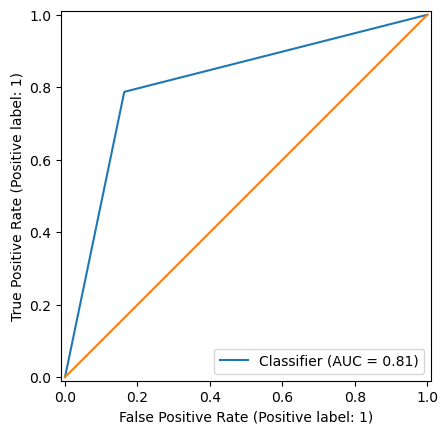

In [46]:
RocCurveDisplay.from_predictions(y_test,clf.predict(x_test))
plt.plot([0,1],[0,1])
plt.show()